 # Abalone Age Prediction
 
 In order to calculate the age of the Abalone you need to predict the number of the rings based on physical measurements

## Import the libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [111]:
df_abalone = pd.read_csv("abalone.csv")
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Lower Case all the columns

In [112]:
def lower_case_column_names(df_abalone):
    df_abalone.columns=[i.lower() for i in df_abalone.columns]
    return df_abalone

In [113]:
df_abalone = lower_case_column_names(df_abalone)
df_abalone

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Checking the DF

In [114]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [115]:
df_abalone["sex"].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [116]:
df_abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [117]:
df_abalone.isna().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

## Changing Column names

In [118]:
df_abalone.rename(columns={"shucked weight": "meat_weight"}, inplace=True)
df_abalone.rename(columns={"viscera weight": "gut_weight"}, inplace=True)
df_abalone.rename(columns={"shell weight": "shell_weight"}, inplace=True)
df_abalone.rename(columns={"whole weight": "whole_weight"}, inplace=True)

In [119]:
df_abalone

,sex,length,diameter,height,whole_weight,meat_weight,gut_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Dropping Duplicates

In [120]:
df_abalone.drop_duplicates()
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4177 non-null   object 
 1   length        4177 non-null   float64
 2   diameter      4177 non-null   float64
 3   height        4177 non-null   float64
 4   whole_weight  4177 non-null   float64
 5   meat_weight   4177 non-null   float64
 6   gut_weight    4177 non-null   float64
 7   shell_weight  4177 non-null   float64
 8   rings         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Visualising the Numerical D

In [121]:
numerical=df_abalone.drop('sex', axis=1)
categorical=df_abalone.sex

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'whole_weight'}>,
        <AxesSubplot:title={'center':'meat_weight'}>,
        <AxesSubplot:title={'center':'gut_weight'}>],
       [<AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'rings'}>, <AxesSubplot:>]],
      dtype=object)

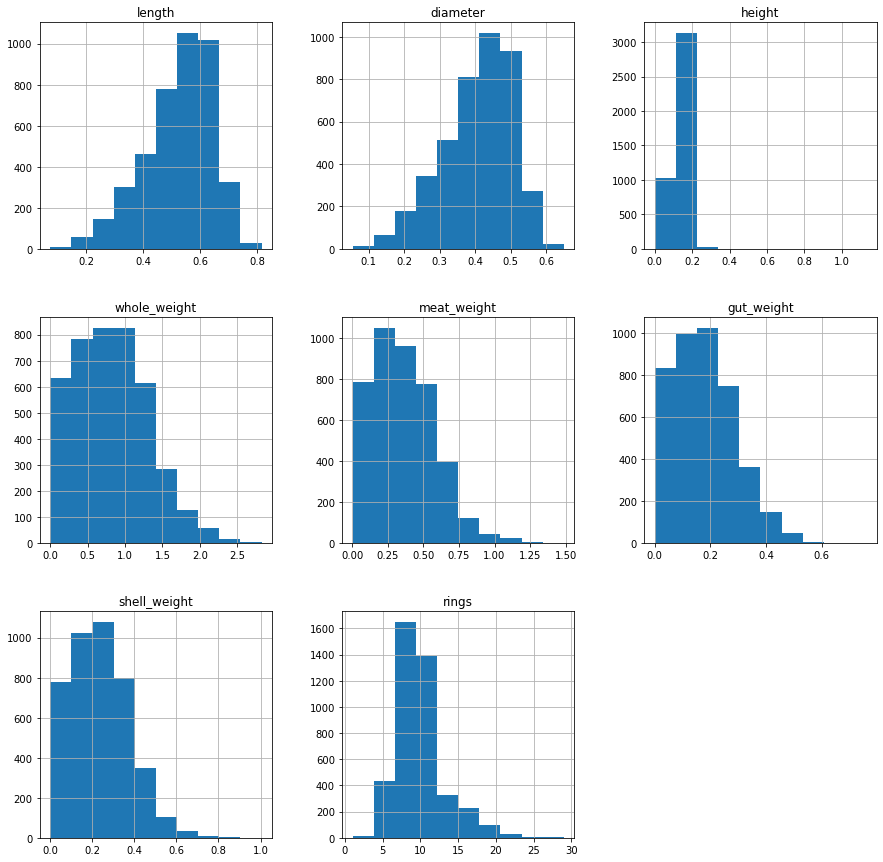

In [122]:
#construct histogram
numerical.hist(figsize=(15,15))

## Checking Correlation

In [123]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column `total_claim_amount` later as the target variable.
numerical.corr()

,length,diameter,height,whole_weight,meat_weight,gut_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
meat_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
gut_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


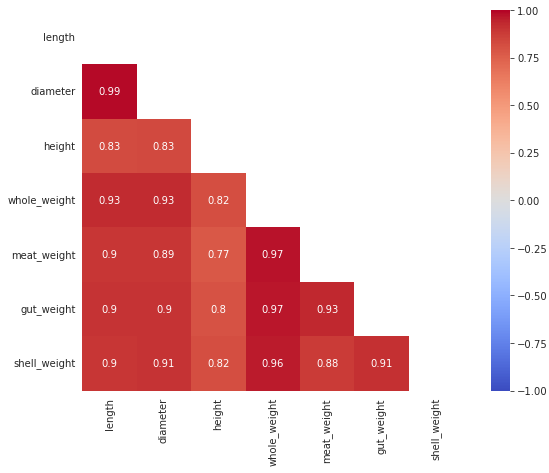

In [124]:
#Plot the Correlation Heatmap.
numerical=numerical.drop("rings", axis=1)
mask = np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(numerical.corr(), mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## First Modeling Attempt

### converting the categorical column  into dummy variables

In [125]:
categorical_dummies=pd.get_dummies(categorical)
categorical_dummies

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


### Concatenate categorical and numerical

In [129]:
abalone=pd.concat([numerical,categorical_dummies], axis=1)
abalone

,length,diameter,height,whole_weight,meat_weight,gut_weight,shell_weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


### X-y Split

In [131]:
X=numerical
y=df_abalone.rings

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   length        4177 non-null   float64
 1   diameter      4177 non-null   float64
 2   height        4177 non-null   float64
 3   whole_weight  4177 non-null   float64
 4   meat_weight   4177 non-null   float64
 5   gut_weight    4177 non-null   float64
 6   shell_weight  4177 non-null   float64
dtypes: float64(7)
memory usage: 228.6 KB


In [133]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

In [134]:
std_scaler=StandardScaler().fit(X_train)  
X_train_scaled=std_scaler.transform(X_train)

X_train_scaled

array([[-0.76828169, -0.91315723, -1.41472805, ..., -0.96532346,
        -1.08739189, -0.98031971],
       [-0.30557427, -0.55627014,  0.3493568 , ...,  0.46568576,
         0.17405782,  0.07091771],
       [ 0.99841937,  0.76931051,  0.23175114, ...,  0.93816748,
         0.83220549,  0.64530516],
       ...,
       [ 0.49364764,  0.41242341,  0.93738508, ..., -0.11756918,
         0.02780278, -0.02661979],
       [ 0.40951902,  0.51439115,  0.58456811, ...,  0.61715119,
         0.29289004,  0.29489269],
       [ 0.83016213,  0.66734276,  0.46696245, ...,  1.09867562,
         0.96017865,  0.56583017]])

In [135]:
X_train.shape

(2923, 7)

In [136]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled

array([[-2.40878982, -2.44267336, -2.12036199, ..., -1.54405705,
        -1.52158653, -1.62695716],
       [ 0.49364764,  0.61635889,  0.58456811, ...,  1.98034007,
         0.42543367,  0.39243018],
       [-0.76828169, -0.76020562, -0.70909411, ..., -0.87037498,
        -0.88172074, -0.94419472],
       ...,
       [-0.4317672 , -0.55627014, -0.12106583, ..., -0.66691395,
        -0.84515698, -0.70215723],
       [-0.47383151, -0.35233465, -0.82669977, ..., -0.88167837,
        -0.87715027, -0.69131973],
       [-1.73576084, -1.72889917, -1.2971224 , ..., -1.35868144,
        -1.42560666, -1.46439468]])

In [137]:
X.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'meat_weight',
       'gut_weight', 'shell_weight'],
      dtype='object')

In [138]:
# Apply linear regression.
model=LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [139]:
# Model Interpretation.
model.coef_

array([-0.22942969,  1.36525519,  0.43290427,  4.75749366, -4.61758306,
       -1.08264031,  1.15489603])

In [140]:
model.intercept_

9.961683202189532

In [141]:
model.score(X_test,y_test)

/Users/christineiskander/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-0.4599274988254958

#### Prediction

In [142]:
y_pred=model.predict(X_test)
y_pred

/Users/christineiskander/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([10.32556027, 13.64257779, 11.42596   , ..., 11.74533338,
       11.81200676, 10.6071702 ])

In [143]:
y_test

2812     5
1344    10
533      9
866      9
3939    14
        ..
351     22
1747    15
3752     8
2014    10
3524     6
Name: rings, Length: 1254, dtype: int64

In [144]:
# residual check

result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
2812,5,10.325560
1344,10,13.642578
533,9,11.425960
866,9,13.868151
3939,14,13.197206
...,...,...
351,22,13.246773
1747,15,15.971663
3752,8,11.745333
2014,10,11.812007


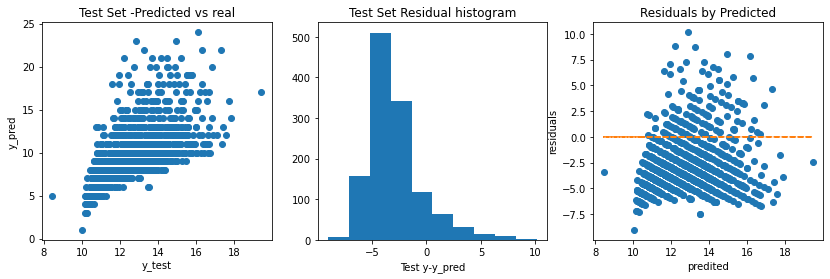

In [145]:
# scatter plot y_pred vs y
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# histogram of the residuals between y - y_pred. 
# Homoscdasticity
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## Model Evaluation

In [146]:
# MSE - Mean Square Error
mse(y_test,y_pred)

14.884845042325141

In [147]:
# RMSE - Root Mean Square Error
mse(y_test, y_pred, squared=False)

3.8580882626405972

In [148]:
# MAE - Mean Absolute Error
mae (y_test, y_pred)

3.4987717517664283

In [149]:
# R2 - percentage of how good the model is
R2=r2_score(y_test,y_pred)
R2

-0.4599274988254958

In [150]:
# Adjusted R2
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

-0.46812933870653795

In [151]:
features_importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': abs(model.coef_)})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
3,whole_weight,4.757494
4,meat_weight,4.617583
1,diameter,1.365255
6,shell_weight,1.154896
5,gut_weight,1.082640
2,height,0.432904
0,length,0.229430


In [152]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled)
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     468.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:28:47   Log-Likelihood:                -6479.5
No. Observations:                2923   AIC:                         1.298e+04
Df Residuals:                    2915   BIC:                         1.302e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9617      0.041    242.200      0.0

## Second Modeling Attempt

### X-y Split

In [153]:
numerical=numerical.drop("length", axis=1)

In [154]:
numerical=numerical.drop("height", axis=1)

In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   length        4177 non-null   float64
 1   diameter      4177 non-null   float64
 2   height        4177 non-null   float64
 3   whole_weight  4177 non-null   float64
 4   meat_weight   4177 non-null   float64
 5   gut_weight    4177 non-null   float64
 6   shell_weight  4177 non-null   float64
dtypes: float64(7)
memory usage: 228.6 KB


In [157]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [158]:
# Standardize the data (after the data split).

std_scaler=StandardScaler().fit(X_train)  
X_train_scaled=std_scaler.transform(X_train)

X_train_scaled

array([[-0.76828169, -0.91315723, -1.41472805, ..., -0.96532346,
        -1.08739189, -0.98031971],
       [-0.30557427, -0.55627014,  0.3493568 , ...,  0.46568576,
         0.17405782,  0.07091771],
       [ 0.99841937,  0.76931051,  0.23175114, ...,  0.93816748,
         0.83220549,  0.64530516],
       ...,
       [ 0.49364764,  0.41242341,  0.93738508, ..., -0.11756918,
         0.02780278, -0.02661979],
       [ 0.40951902,  0.51439115,  0.58456811, ...,  0.61715119,
         0.29289004,  0.29489269],
       [ 0.83016213,  0.66734276,  0.46696245, ...,  1.09867562,
         0.96017865,  0.56583017]])

In [159]:
X_train.shape

(2923, 7)

In [160]:
X.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'meat_weight',
       'gut_weight', 'shell_weight'],
      dtype='object')

## Apply Linear Regression

In [161]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [162]:
model.coef_

array([-0.22942969,  1.36525519,  0.43290427,  4.75749366, -4.61758306,
       -1.08264031,  1.15489603])

In [163]:
model.intercept_

9.961683202189532

In [164]:
model.score(X_test_scaled,y_test)

0.52261686265919